# Nanodegree Engenheiro de Machine Learning
## Projeto de Conclusão de Curso
## Project 5: Análise de padrões de rotas de veículos

## Introdução

Neste projeto será analisado o conjunto de dados de passagens de veículos por pontos de uma cidade. A base de dados contém a placa do veículo e a latitude e longitude do ponto de monitoramento. Esses dados se referem aos dias 14 e 15 de setembro de 2017. O objetivo deste projeto é identificar padrões de rotas de veículos, considerando para isso, a quantidade de vezes que cada veículo passou pelo ponto de controle em durante dois dias. 

**Política de privacidade e confidencialidade das informações**

Para que não seja infligida a privacidade dos donos dos veículos e a confidencialidade dos dados, tanto as placas quanto os dados dos pontos de controle foram cifrados para que se tornassem ininteligíveis. 

## Preparação dos dados
Aqui serão importados os dados e preparada a tabela de pontos por características (placa por locais).

In [64]:
# Bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Mostre matplotlib no corpo do texto (bem formatado no Notebook)
%matplotlib inline

# Carregamento do conjunto de dados dos veículos
try:
    data_csv = pd.read_csv("veiculos_14e15set_trans.csv")
    print "Base de dados contém {} passagens com {} características cada.".format(*data_csv.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing??"

Base de dados contém 2455348 passagens com 5 características cada.


- Verificando quais colunas foram importadas, a coluna 'count' conta quantas vezes o veículo passou no ponto; 
- Removendo linhas que contenham latitude igual a zero, pois trata-se de um erro nos dados;
- Verificando quantas linhas e colunas possui a base de dados

In [65]:
display(data_csv.columns)
data_csv.drop(data_csv.loc_latitude == 0, inplace=True)
print data_csv.shape

Index([u'Unnamed: 0', u'loc_placa', u'loc_latitude', u'loc_longitude',
       u'count'],
      dtype='object')

(2455346, 5)


Concatenando as colunas latitude e longitude em apenas uma coluna denominada "local":

In [3]:
data_csv['local'] = data_csv['loc_latitude'].map(str) + " " + data_csv['loc_longitude'].map(str) #cria coluna concatenando latitude e longitude
data_csv.drop(['loc_latitude', 'loc_longitude'], axis = 1, inplace = True)
lista_veiculos = set(data_csv['loc_placa'])
lista_locais = set(data_csv['local'])
print "Foram encontrados {} veículos passando por {} pontos." .format(len(lista_veiculos), len(lista_locais))

Foram encontrados 618757 veículos passando por 135 pontos.


In [4]:
#indexa o DataFrame pelo campo 'loc_placa'
data_csv.set_index(['loc_placa'], inplace = True)
display(data_csv.head(n=5))

,Unnamed: 0,count,local
loc_placa,,,
OTS5855,4,1,1412 9134
APS9101,5,1,5825 9794
HRN6599,6,2,9222 5020
OFI2494,7,1,2324 8727
PAM3495,8,1,3444 967


O próximo passo é criar uma tabela em que cada linha contenha um veículo e cada coluna a latitude e longitude de um ponto de controle.

In [5]:
def create_df_placaporpontos(data_csv, local_column):
    lista_veiculos = set(data_csv.index)
    lista_locais = set(data_csv[local_column])
    data = pd.DataFrame(index = lista_veiculos, columns = lista_locais)
    data.fillna(0, inplace=True)
    for local in lista_locais:
        try:
            data_temp = pd.DataFrame(data_csv[data_csv[local_column] == local])
            data[local]=data[local].add(data_temp['count'], fill_value = 0)
        except:
            display(data_temp)
            data_temp.to_csv('data_temp.csv')
    return data

In [6]:
data = create_df_placaporpontos(data_csv, 'local')
print "tabela criada com sucesso"

tabela criada com sucesso


Salvando o dataframe em arquivo:

In [7]:
try:
    data.to_csv('placas_por_pontos_geral.csv')
    print "arquivo salvo com sucesso"
except:
    print "erro ao salvar arquivo"

arquivo salvo com sucesso


### Apresentando a tabela
A tabela abaixo é a tabela que será utilizada para desenvolvimento do projeto, cada linha contém um veículo e em cada coluna a quantidade de vezes que o veículo passou por cada ponto de controle, as colunas serão tratadas como características de cada veículo. 

In [7]:
display(data.head(n=10))

,5613 8278,4738 6727,4332 2860,8053 4258,3444 967,1412 9134,5880 8554,2833 1278,3416 1233,2374 6763,...,5000 4778,4162 7589,472 5552,1382 4248,4853 8470,9430 4736,5303 7658,7723 5667,9666 833,7272 1070
HXX6311,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OES0945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HWC4722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HXX6312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
NMQ8671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NTM2610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ODI1168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OES0947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NTQ9976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ODI1161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def plot_bar_graph(dados, labels, cor="blue", x_label = " ", y_label = " ", title = " "): #função que traça o gráfico de barra
    import matplotlib.pyplot as plt
    width = 1/1.5
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.bar(labels, dados, width, color=cor)
    return None

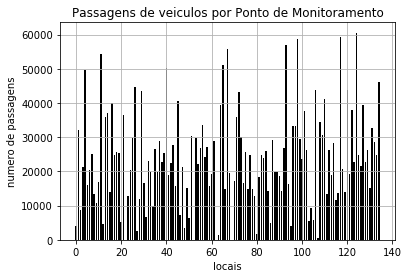

In [9]:
plot_bar_graph(data.sum(), np.arange(data.shape[1]), x_label = "locais", y_label = "numero de passagens", title = "Passagens de veiculos por Ponto de Monitoramento", cor = 'black')

In [10]:
display(data.describe())
try:
    data.describe().to_csv('data_describe.csv')
    print "arquivo salvo com sucesso"
except:
    print "erro ao salvar arquivo"

,5613 8278,4738 6727,4332 2860,8053 4258,3444 967,1412 9134,5880 8554,2833 1278,3416 1233,2374 6763,...,5000 4778,4162 7589,472 5552,1382 4248,4853 8470,9430 4736,5303 7658,7723 5667,9666 833,7272 1070
count,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.00000,618757.000000,...,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000
mean,0.006311,0.052074,0.014161,0.034257,0.080246,0.025758,0.033116,0.040683,0.02160,0.017370,...,0.040292,0.034631,0.063458,0.036882,0.042560,0.024396,0.053027,0.046273,0.039922,0.074368
std,0.095645,0.474153,0.148592,0.285901,0.814628,0.184976,0.231416,0.244743,0.17967,0.173292,...,0.276702,0.238282,0.386831,0.307453,0.643333,0.215558,0.313068,0.261491,0.517614,0.376809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,295.000000,21.000000,39.000000,578.000000,22.000000,77.000000,12.000000,10.00000,18.000000,...,28.000000,20.000000,192.000000,23.000000,468.000000,89.000000,28.000000,11.000000,353.000000,61.000000


arquivo salvo com sucesso


### Implementação: PCA

Como existem 135 características, será utilizado o PCA para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

In [11]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(data)
print "Array com a variança explicada acumulada:"
np.cumsum(pca.explained_variance_ratio_)


Array com a variança explicada acumulada:


array([ 0.47496722,  0.5282771 ,  0.56556268,  0.58944722,  0.60864399,
        0.62347305,  0.6367917 ,  0.6495455 ,  0.66147761,  0.6719452 ,
        0.68173067,  0.69093638,  0.69981432,  0.70845341,  0.71694802,
        0.72514737,  0.73278869,  0.73972053,  0.74618339,  0.75230353,
        0.75804191,  0.76323077,  0.76815682,  0.77301976,  0.77775253,
        0.78243464,  0.78706639,  0.79151248,  0.79579023,  0.80000811,
        0.80417421,  0.80820658,  0.81212292,  0.81594846,  0.81955968,
        0.82311048,  0.82653188,  0.82987783,  0.83319075,  0.83647433,
        0.83972484,  0.84293782,  0.84610096,  0.84922782,  0.85224638,
        0.85523146,  0.85814351,  0.86101591,  0.86382724,  0.86659326])

### Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

Pelo Array de variança explicada pode-se ver que com 30 dimensões 80% da variança dos dados é explicada, portanto será utilizada a redução de dimensionalidade pelo PCA de **135** para **30** dimensões

In [12]:
# Ajustanto o PCA com 30 dimensões
pca = PCA(n_components = 30)
pca.fit(data)

# Transformando os dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(data)

# Criando o DataFrame para os dados reduzidos
pca_dimensions = list()
for x in range(30):
    pca_dimensions.append("Dimension " + str(x))
reduced_data = pd.DataFrame(reduced_data, columns = pca_dimensions)

In [13]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(reduced_data[0:10])

,Dimension 0,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8,Dimension 9,...,Dimension 20,Dimension 21,Dimension 22,Dimension 23,Dimension 24,Dimension 25,Dimension 26,Dimension 27,Dimension 28,Dimension 29
0,0.046368,0.786888,-0.231217,4.598311,-0.136251,-0.075393,0.118652,0.139594,0.878143,-0.122852,...,0.063125,-0.108645,-0.152743,0.262823,0.647691,0.201593,-0.032836,-0.125419,-0.191826,-0.109289
1,-0.322102,0.156673,-0.120396,-0.137725,0.020574,-0.084712,0.064879,-0.040052,-0.026321,-0.012002,...,0.105933,-0.050102,-0.074857,0.051545,0.038042,-0.130580,0.103019,0.175777,0.117640,0.088462
2,-0.338625,0.148377,-0.077650,-0.134412,0.047867,-0.182348,-0.007760,-0.045206,-0.059833,-0.050904,...,0.043979,-0.013787,-0.055949,-0.035314,-0.003011,0.003662,-0.029128,0.108638,-0.081193,0.017529
3,0.028331,0.476897,-0.257951,-0.074674,-0.051786,-0.500588,-0.159454,0.087696,0.088431,0.200579,...,-0.747656,0.041722,0.205719,0.239638,0.078862,0.180429,0.370713,0.030365,0.145034,-0.029498
4,-0.334127,0.142917,-0.038640,-0.115720,0.092119,-0.205978,-0.057621,-0.052584,-0.084572,0.044554,...,0.276830,0.087826,0.048934,-0.376932,-0.105030,0.051523,0.152695,0.014542,-0.078289,0.197228
5,-0.117623,0.377637,-0.194717,-0.184886,-0.087086,0.403394,-0.572041,-0.026516,-0.118525,0.004584,...,-0.003009,0.056655,0.752017,-0.020626,0.337584,-0.215828,-0.197415,0.102431,-0.034324,-0.237894
6,-0.290270,0.184811,-0.132350,-0.052194,0.031188,-0.245091,-0.009659,-0.005572,0.120335,-0.069448,...,0.085741,0.007343,-0.019078,0.011036,0.016101,-0.044164,-0.051282,-0.031248,-0.015429,0.006075
7,-0.337188,0.125138,-0.093540,-0.127865,0.071926,-0.205023,-0.012229,-0.043576,-0.061263,-0.047586,...,0.011105,0.052404,0.005107,-0.054691,0.004132,0.014695,-0.007914,0.049798,-0.076148,0.027238
8,-0.339927,0.158331,-0.108719,0.250194,0.048905,-0.181299,0.006794,-0.067687,-0.150710,-0.059602,...,0.087829,0.039344,0.027843,0.000770,-0.114117,-0.085585,0.011464,-0.026329,0.016413,-0.027026
9,-0.331822,0.138421,0.044811,-0.137309,0.061678,-0.173654,-0.012456,-0.031453,-0.082368,0.053460,...,-0.108125,0.206554,0.029959,-0.781493,0.082978,0.391191,0.216442,0.085141,-0.174183,0.005824


## Clustering

Nesta seção, os dados serão clusterizados para que sejam definidos grupos com comportamentos em comum. Será utilizado o algoritmo de clustering K-Means. 

In [14]:
from sklearn.cluster import KMeans

def make_clusterer(data, number_of_clusters): #função que cria um clusterer e o retorna treinado
    
    clusterer_test = KMeans(n_clusters=number_of_clusters) #Algorítimo de clusters escolhido: KMeans
    clusterer_test.fit(data)
    return clusterer_test

In [ ]:
# Clusterizando os dados reduzidos em 30 clusters
clusterer = make_clusterer(reduced_data, 30) 
        
# Prevendo o cluster para cada ponto de dado
preds = clusterer.predict(reduced_data)

### Visualização de Clusters
Os dados foram clusterizados com 30 dimensões, portanto não há como plotar um gráfico de dispersão com 30 dimensões. Uma forma de se ter uma idéia de como os pontos estão distribuídos entre os segmentos é um gráfico de barras em que cada barra representa a frequência dos pontos para cada segmento.

Como a frequência entre os segmentos tem valores discrepantes umas das outras, para melhor visualização do gráfico será utilizada uma escala logarítimica.

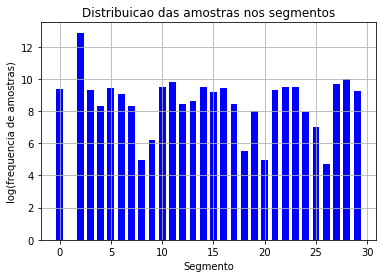

In [17]:
labels = clusterer.labels_
x_labels =  np.arange(0, (1+labels.max()))
freq_labels = np.bincount(labels)
log_freq = np.log(freq_labels)
plot_bar_graph(log_freq, x_labels, x_label = "Segmento", y_label = "log(frequencia de amostras)", title = "Distribuicao das amostras nos segmentos")

### Análise dos segmentos obtidos
O gráfico acima representa trinta padrões de comportamentos de veículos durante dois dias. A partir desse ponto, pode-se usar os segmentos para verificar veículos que se comportam de forma parecida. 

Um segundo conjunto de dados contém veículos com restrições de envolvimento em crimes, como roubo/furto, clonados e proprietários com passagem na polícia. Esse segundo conjunto de dados são dos dias 21 e 22 de setembro de 2017, também uma Quinta e Sexta-feria, porém em dias diferentes do primeiro conjunto de dados. 

In [15]:
try:
    data_csv2 = pd.read_csv("veiculosrestricao21e22set_trans.csv")
    
    print "Base de dados contém {} pontos com {} características cada.".format(*data_csv2.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing??"

Base de dados contém 3761 pontos com 5 características cada.


In [16]:
display(data_csv2.columns)

Index([u'Unnamed: 0', u'placa', u'loc_latitude', u'loc_longitude', u'count'], dtype='object')

In [17]:
data_csv2['local'] = data_csv2['loc_latitude'].map(str) + " " + data_csv2['loc_longitude'].map(str) #cria coluna concatenando latitude e longitude
data_csv2.drop(['loc_latitude', 'loc_longitude'], axis = 1, inplace = True)
lista_veiculos = set(data_csv2['placa'])
lista_locais = set(data_csv2['local'])
print "Foram encontrados {} veículos passando por {} pontos." .format(len(lista_veiculos), len(lista_locais))

Foram encontrados 2375 veículos passando por 196 pontos.


In [18]:
display(data_csv2.head(n=5))

,Unnamed: 0,placa,count,local
0,1,ODT2896,1,4316 3639
1,2,ICN7385,1,2403 9277
2,3,HQX7704,1,1000 833
3,4,BUI6155,1,2822 0
4,5,LNB4997,1,3553 9819


In [19]:
data_csv2.set_index(['placa'], inplace = True)
data_csv2.drop(['Unnamed: 0'], axis=1, inplace = True)
display(data_csv2.head(n=5))

,count,local
placa,,
ODT2896,1,4316 3639
ICN7385,1,2403 9277
HQX7704,1,1000 833
BUI6155,1,2822 0
LNB4997,1,3553 9819


In [20]:
display(data_csv2.shape)
display(len(set(data_csv2.index)))

(3761, 2)

2375

In [21]:
#Criação de tabela prévia para receber os dados de veículos por locais
data_restricao_prev = create_df_placaporpontos(data_csv2, 'local')
display(data_restricao_prev.shape)

(2375, 196)

Este segundo conjunto de dados contem 196 pontos de controle de veículo, porém para comparar a rota desses veículos com os padrões ja definidos anteriormente, serão considerados somente os 135 pontos de controle utilizados antecoriormente.

O bloco abaixo faz esse ajuste de características.

In [22]:
# Encontra as colunas que nao foram treinadas com o conjunto principal de dados
colunas_nao_treinadas = list(data_restricao_prev.columns)
print len(colunas_nao_treinadas)

for loc in data.columns:
    if loc in colunas_nao_treinadas:
        colunas_nao_treinadas.remove(loc)
print len(colunas_nao_treinadas)

196
67


In [23]:
#Retira as colunas não treinadas 
data_restricao = data_restricao_prev.drop(colunas_nao_treinadas, axis = 1)
display(data_restricao.shape)

(2375, 129)

Agora que as colunas não treinadas foram retiradas do novo data frame, é necessário incluir as colunas que estão contidas nos dados principais e não estão neste segundo conjunto, a fim de que os dados tenham as mesmas características e possam ser comparados.

In [24]:
colunas_faltantes = list()
for c in data.columns:
    if c in data_restricao.columns:
        None
    else:
        colunas_faltantes.append(c)
print colunas_faltantes

['0 9999', '4111 7000', '9556 4000', '9999 9999', '6967 2919', '6000 6194']


In [25]:
colunas_faltantes_frame = np.zeros(shape=(len(data_restricao.index),len(colunas_faltantes)))
colunas_faltantes_df=pd.DataFrame(colunas_faltantes_frame, index = data_restricao.index, columns=[colunas_faltantes])
data_restricao=pd.concat([data_restricao, colunas_faltantes_df], axis=1)
print "Tamanho final do data frame:" 
display(data_restricao.shape)
data_restricao.fillna(0, inplace = True)

Tamanho final do data frame:


(2375, 135)

O conjunto de dados de veículos com restrição possui veículos de outras localidades, por esse motivo que haviam as colunas a mais que foram retiradas. Agora, é necessário retirar do data frame os veículos que não passaram por nenhum ponto de monitoramento treinado.

In [26]:
#removendo os veículos que nao passaram por nenhum ponto treinado
data_restricao = data_restricao.loc[(data_restricao!=0).any(axis=1)]

In [27]:
print "O data frame final possui {} veículos passando nos {} pontos treinados" .format(*data_restricao.shape)

O data frame final possui 2068 veículos passando nos 135 pontos treinados


Transformando as dimensões de data_restrição nas dimensões PCA treinadas anteriormente

In [29]:
data_restricao_pca = pca.transform(data_restricao) #aplica PCA
data_restricao_pca = pd.DataFrame(data_restricao_pca, columns = pca_dimensions) #coloca os dados em um DataFrame

In [ ]:
data_restricao_pred = clusterer.predict(data_restricao_pca) #predição dos dados nos clusteres treinados
freq_restricao = np.bincount(data_restricao_pred) #distribuição de frequência de cada cluster para veículos com restrição
log_freq_restricao = np.log(freq_restricao)

### Comparando os dados
Agora que os veículos com restrição foram divididos nos segmentos de veículos calculados anteriormente, será verificado como eles se distribuem nos segmentos.
Em azul será plotado os veículos em geral, em vermelho os veículos com restrição. É importante lembrar que a escala utilizada com o gráfico não é decimal, e sim logarítimica.

In [30]:
def plot_thwo_bars_graph(a, b, x_label = "", y_label = "", title = ""):
    import numpy as np
    import matplotlib.pyplot as plt

    x_a = range(len(a))
    x_b = range(len(b))
    width = 1/1.5
    fig, ax = plt.subplots()
    rect_a = ax.bar(x_a, a, width, color='b')
    rect_b = ax.bar(x_b, b, width, color='r')
    plt.grid(True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    return None

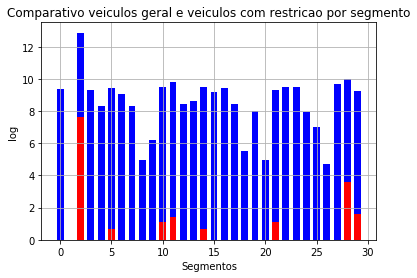

In [70]:
plot_thwo_bars_graph(log_freq, log_freq_restricao, title = "Comparativo veiculos geral e veiculos com restricao por segmento", y_label = "log", x_label = "Segmentos")

In [71]:
# verificando o tamanho de cada array
print freq_restricao.shape
print freq_labels.shape

(30,)
(30,)


### Calculando a taxa de veículos com restrição em cada segmento

Será calculado a porcentagem da frequência dos veículos com restrição com relação aos veículos gerais.

In [72]:
#a = freq_labels.shape[0]-freq_restricao.shape[0]
#freq_restricao = np.append(freq_restricao, np.zeros(a))

In [73]:
x=freq_restricao.astype(float)
restricao_ratio=np.divide(x,freq_labels)

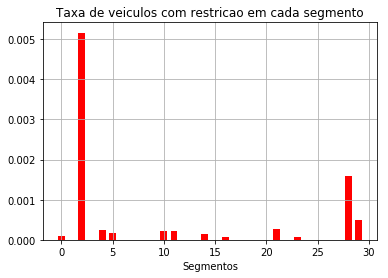

In [74]:
plot_bar_graph(restricao_ratio, x_labels, cor='red', x_label = "Segmentos", y_label = "", title = "Taxa de veiculos com restricao em cada segmento")

In [70]:
def make_score(freq_target, freq_labels):
    a = freq_labels.shape[0]-freq_target.shape[0]
    freq_target = np.append(freq_target, np.zeros(a))
  
    target_ratio=np.divide(freq_target.astype(float), freq_labels)
    score = np.multiply(target_ratio, freq_target)
    max_score=np.max(score)
    
    return max_score

In [78]:
print "A maior taxa foi de {} no Segmento {}." .format(np.max(restricao_ratio), np.argmax(restricao_ratio))
score=make_score(freq_restricao,freq_labels)
print "O score para essa clusterização é {:.4f}." .format(score)

A maior taxa foi de 0.00516380759483 no Segmento 2.
O score para essa clusterização é 10.3741.


### Otimização
Será buscado agora uma clusterização que maximize o Score.

In [268]:
def test_n_clusters(data, data_target, n_clusters):
    
    max_ratio = 0

    clusterer = make_clusterer(data, n_clusters) #clusterização
    labels = clusterer.labels_
    freq_labels = np.bincount(labels)
        
    data_target_pred = clusterer.predict(data_target) #predição dos dados alvo nos clusteres treinados
    freq_target = np.bincount(data_target_pred) #distribuição de frequência por clusters dos dados alvo
      
    score = make_score(freq_target, freq_labels)
        
    return (score, clusterer)

In [88]:
def test_range_of_clusters(data, data_target, range_of_clusters):
    
    score_per_n_clusters = dict()
    max_score = 0

    for n in range_of_clusters:
        (score_per_n_clusters[n], clusterer) = test_n_clusters(reduced_data, data_restricao_pca, n)
        print "Para {} segmentos, Score = {}" .format(n, score_per_n_clusters[n])
        
        if max_score < score_per_n_clusters[n]:
            best_clusterer = clusterer
            max_score = score_per_n_clusters[n]
    
    return (score_per_n_clusters, best_clusterer)

In [89]:
range_of_clusters1=range(10, 101, 10) #Numeros de clusters a serem testados
range_of_clusters1.remove(30) #Removendo a clusterização que já foi testada anteriormente
print "Testando as clusterizações: {}" .format(range_of_clusters1)
(score_range1, best_clusterer1) = test_range_of_clusters(reduced_data, data_restricao_pca, range_of_clusters1)

Testando as clusterizações: [10, 20, 40, 50, 60, 70, 80, 90, 100]
Para 10 segmentos, Score = 8.55316367845
Para 20 segmentos, Score = 9.46419482842
Para 40 segmentos, Score = 10.9924953096
Para 50 segmentos, Score = 10.9900282293
Para 60 segmentos, Score = 12.0521528726
Para 70 segmentos, Score = 11.3382518369
Para 80 segmentos, Score = 12.1896617341
Para 90 segmentos, Score = 12.6171970908
Para 100 segmentos, Score = 12.2236953489


In [150]:
range_of_clusters2=range(110, 151, 10) #Numeros de clusters a serem testados
print "Testando as clusterizações: {}" .format(range_of_clusters2)
(score_range2, best_clusterer2) = test_range_of_clusters(reduced_data, data_restricao_pca, range_of_clusters2)

Testando as clusterizações: [110, 120, 130, 140, 150]
Para 110 segmentos, Score = 11.8894258651
Para 120 segmentos, Score = 12.0624076745
Para 130 segmentos, Score = 11.3405010546
Para 140 segmentos, Score = 10.5466315693
Para 150 segmentos, Score = 12.2641370669


In [154]:
range_of_clusters3=np.append(range(88, 90), (91,93)) #Numeros de clusters a serem testados
print "Testando as clusterizações: {}" .format(range_of_clusters3)
(score_range3, best_clusterer3) = test_range_of_clusters(reduced_data, data_restricao_pca, range_of_clusters3)

Testando as clusterizações: [88 89 91 93]
Para 88 segmentos, Score = 11.9591641471
Para 89 segmentos, Score = 12.1922626026
Para 91 segmentos, Score = 11.8714149878
Para 93 segmentos, Score = 11.3888944273


In [162]:
score_per_clustering=pd.concat([pd.DataFrame([score_range1]), pd.DataFrame([score_range2]), pd.DataFrame([score_range3])], axis=1)
score_per_clustering=score_per_clustering.T
score_per_clustering = score_per_clustering.rename(columns = {0:'score'})
score_per_clustering.loc[30] = score #Score calculado anteriormente para 30 clusteres
display(score_per_clustering)

,score
10,8.553164
20,9.464195
40,10.992495
50,10.990028
60,12.052153
70,11.338252
80,12.189662
90,12.617197
100,12.223695
110,11.889426


Melhor ajuste encontrado foi com 90 clusters, que atingiu um score de 12.6171970908.


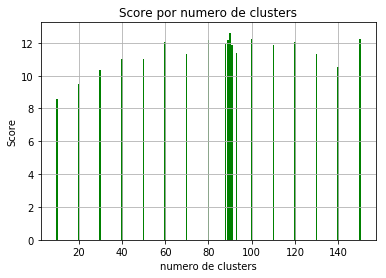

In [163]:
plot_bar_graph(score_per_clustering['score'], score_per_clustering.index, cor='green', x_label = "numero de clusters", y_label = "Score", title = "Score por numero de clusters")
print "Melhor ajuste encontrado foi com {} clusters, que atingiu um score de {}." .format(score_per_clustering['score'].idxmax(), score_per_clustering['score'].max())

/Users/tamara/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


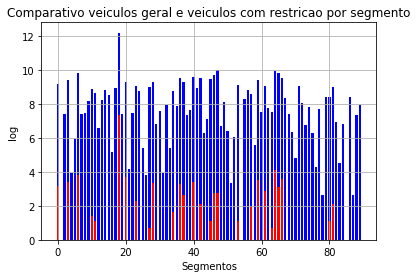

In [173]:
#Melhor clusterer: best_clusterer
best_clusterer = best_clusterer1
best_labels = best_clusterer.labels_
best_freq_labels = np.bincount(best_labels)
        
best_data_restricao_pred = best_clusterer.predict(data_restricao_pca) #predição dos dados alvo nos clusteres treinados
best_freq_restricao = np.bincount(best_data_restricao_pred) #distribuição de frequência por clusters dos dados alvo
        
a = best_freq_labels.shape[0] - best_freq_restricao.shape[0]        #ajusta o tamanho de vest_freq_resticao
best_freq_restricao = np.append(best_freq_restricao, np.zeros(a))   #ao tamanho de best_freq_labels

best_restricao_ratio=np.divide(best_freq_restricao.astype(float),best_freq_labels)
best_restricao_score = np.multiply(best_freq_restricao, best_restricao_ratio)
perc_max_restricao=100*best_freq_restricao[np.argmax(best_freq_restricao)]/np.sum(best_freq_restricao)

log_best_freq = np.log(best_freq_labels)
log_best_freq_restricao = np.log(best_freq_restricao)

x_best_labels =  np.arange(0, (1+best_labels.max()))

plot_thwo_bars_graph(log_best_freq, log_best_freq_restricao, title = "Comparativo veiculos geral e veiculos com restricao por segmento", y_label = "log", x_label = "Segmentos")

O Segmento 18 é o segmento com maior taxa de veículos com restricao, 0.0081


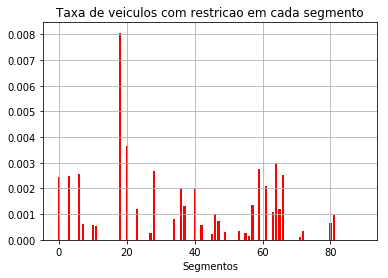

In [261]:
plot_bar_graph(best_restricao_ratio, x_best_labels, cor='red', x_label = "Segmentos", y_label = "", title = "Taxa de veiculos com restricao em cada segmento")
print "O Segmento {} é o segmento com maior taxa de veículos com restricao, {:.4f}" .format(np.argmax(best_restricao_ratio), np.max(best_restricao_ratio))

O Segmento 18 é o segmento com maior score, 12.6172.
Esse seguimento possui 75.63% dos veículos com restricao


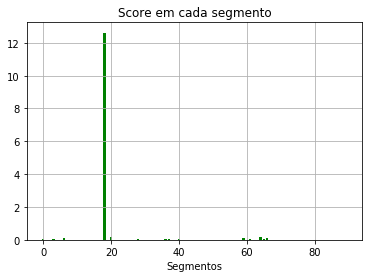

In [262]:
plot_bar_graph(best_restricao_score, x_best_labels, cor='green', x_label = "Segmentos", y_label = "", title = "Score em cada segmento")
print "O Segmento {} é o segmento com maior score, {:.4f}." .format(np.argmax(best_restricao_score), np.max(best_restricao_score))
print "Esse seguimento possui {:.2f}% dos veículos com restricao" .format(perc_max_restricao)

In [263]:
perc_max_labels=100*best_freq_labels[np.argmax(best_freq_restricao)].astype(float)/np.sum(best_freq_labels)
print "O segmento {} representa {:.2f}% dos veículos em geral." .format(np.argmax(best_freq_restricao), perc_max_labels)


O segmento 18 representa 31.33% dos veículos em geral.


### Benchmark
O Critério de pontuação até agora utilizado será comparado com a pontuação de silhuetta, de sklearn.metrics.silhoete_score

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_sil_score(data, number_of_clusters): #função que retorna a pontuação silhoueta dado o número de clusters
    clusterer = make_clusterer(data, number_of_clusters)
    preds = clusterer.predict(data)
    score = silhouette_score(data, preds)
    return (score, clusterer)ac

In [43]:
def test_range_sil_score(range_sil_score):
    best_sil_score = 0
    best_n_clusters_sil = 0
    for n_clusters in range_sil_score: #loop que testa e exibe o silhouette para 2 a 10 clusters
        (sil_score, clusterer_sil) = get_sil_score(reduced_data_sample, n_clusters)
        print "Silhouette Score = {:.4f} para {} clusters"  .format(sil_score, n_clusters)
        if sil_score > best_sil_score: #Verifica se a pontuação atual é a melhor até agora
            best_sil_score = sil_score #armazena e melhor pontuação
            best_n_clusters_sil = n_clusters #armazena o melhor número de clusters
            best_clusterer_sil = clusterer_sil

    print "Os dados foram melhor clusterizados em {} clusters." .format(best_n_clusters_sil)
    
    return(best_clusterer_sil)

In [55]:
reduced_data_sample = reduced_data.sample(frac=0.01)
display(reduced_data_sample.shape)

(6188, 30)

In [56]:
best_clusterer_sil1 = test_range_sil_score(range(2,15,5))

Silhouette Score = 0.6291 para 2 clusters
Silhouette Score = 0.4245 para 7 clusters
Silhouette Score = 0.3753 para 12 clusters
Os dados foram melhor clusterizados em 2 clusters.


In [58]:
best_clusterer_sil2 = test_range_sil_score(range(3,7))

Silhouette Score = 0.6156 para 3 clusters
Silhouette Score = 0.4677 para 4 clusters
Silhouette Score = 0.4734 para 5 clusters
Silhouette Score = 0.4731 para 6 clusters
Os dados foram melhor clusterizados em 3 clusters.


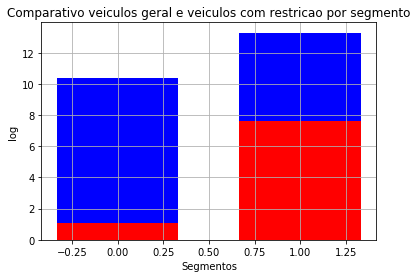

In [66]:
#Melhor clusterer: best_clusterer
best_clusterer_sil = best_clusterer_sil1
best_labels_sil = best_clusterer_sil.predict(reduced_data)
best_freq_labels_sil = np.bincount(best_labels_sil)
        
best_data_restricao_pred_sil = best_clusterer_sil.predict(data_restricao_pca) #predição dos dados alvo nos clusteres treinados
best_freq_restricao_sil = np.bincount(best_data_restricao_pred_sil) #distribuição de frequência por clusters dos dados alvo
        
a = best_freq_labels_sil.shape[0] - best_freq_restricao_sil.shape[0]        #ajusta o tamanho de vest_freq_resticao
best_freq_restricao_sil = np.append(best_freq_restricao_sil, np.zeros(a))   #ao tamanho de best_freq_labels

best_restricao_ratio_sil=np.divide(best_freq_restricao_sil.astype(float),best_freq_labels_sil)
best_restricao_score_sil = np.multiply(best_freq_restricao_sil, best_restricao_ratio_sil)
perc_max_restricao_sil=100*best_freq_restricao_sil[np.argmax(best_freq_restricao_sil)]/np.sum(best_freq_restricao_sil)

log_best_freq_sil = np.log(best_freq_labels_sil)
log_best_freq_restricao_sil = np.log(best_freq_restricao_sil)

x_best_labels =  np.arange(0, (1+best_labels_sil.max()))

plot_thwo_bars_graph(log_best_freq_sil, log_best_freq_restricao_sil, title = "Comparativo veiculos geral e veiculos com restricao por segmento", y_label = "log", x_label = "Segmentos")

O Segmento 1 é o segmento com maior taxa de veículos com restricao, 0.0035


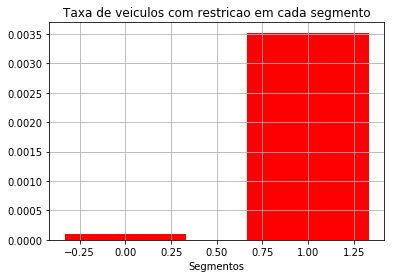

In [67]:
plot_bar_graph(best_restricao_ratio_sil, x_best_labels, cor='red', x_label = "Segmentos", y_label = "", title = "Taxa de veiculos com restricao em cada segmento")
print "O Segmento {} é o segmento com maior taxa de veículos com restricao, {:.4f}" .format(np.argmax(best_restricao_ratio_sil), np.max(best_restricao_ratio_sil))

O Segmento 1 é o segmento com maior score, 7.2666.
Esse seguimento possui 99.85% dos veículos com restricao


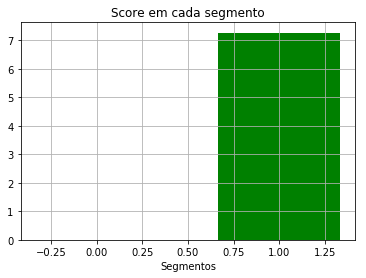

In [68]:
plot_bar_graph(best_restricao_score_sil, x_best_labels, cor='green', x_label = "Segmentos", y_label = "", title = "Score em cada segmento")
print "O Segmento {} é o segmento com maior score, {:.4f}." .format(np.argmax(best_restricao_score_sil), np.max(best_restricao_score_sil))
print "Esse seguimento possui {:.2f}% dos veículos com restricao" .format(perc_max_restricao_sil)

In [69]:
perc_max_labels_sil=100*best_freq_labels_sil[np.argmax(best_freq_restricao_sil)].astype(float)/np.sum(best_freq_labels_sil)
print "O segmento {} representa {:.2f}% dos veículos em geral." .format(np.argmax(best_freq_restricao_sil), perc_max_labels_sil)

O segmento 1 representa 94.84% dos veículos em geral.


### Validação

In [248]:
try:
    data_csv3 = pd.read_csv("veiculosrestricao12e13out_trans.csv")
    
    print "Base de dados contém {} passagens com {} características cada.".format(*data_csv3.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing??"

Base de dados contém 3939 passagens com 5 características cada.


In [249]:
data_csv3['local'] = data_csv3['loc_latitude'].map(str) + " " + data_csv3['loc_longitude'].map(str) #cria coluna concatenando latitude e longitude
data_csv3.drop(['loc_latitude', 'loc_longitude'], axis = 1, inplace = True)
lista_veiculos_val = set(data_csv3['placa'])
lista_locais_val = set(data_csv3['local'])
print "Foram encontrados {} veículos passando por {} pontos." .format(len(lista_veiculos_val), len(lista_locais_val))

Foram encontrados 2458 veículos passando por 195 pontos.


In [250]:
print data_csv3.columns

Index([u'Unnamed: 0', u'placa', u'count', u'local'], dtype='object')


In [251]:
data_csv3.set_index(['placa'], inplace = True)
data_csv3.drop(['Unnamed: 0'], axis=1, inplace = True)
display(data_csv3.head(n=5))

,count,local
placa,,
JSU6950,1,312 1961
PHM8690,1,7812 6182
PLF9114,1,7260 9133
HYT6516,1,6072 9488
OLS7252,1,224 9684


In [252]:
#Criação de tabela prévia para receber os dados de veículos por locais
data_validacao_prev = create_df_placaporpontos(data_csv3, 'local')
display(data_validacao_prev.shape)

(2458, 195)

In [253]:
display(data_validacao_prev.head(n=5))

,9988 1800,3366 9194,4738 6727,4332 2860,8053 4258,638 3103,7210 1962,1412 9134,5880 8554,2422 172,...,5303 7658,9961 3078,1866 1061,7723 5667,9666 833,1528 50,2612 6611,8188 8761,7272 1070,9711 2269
PDZ4450,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NPO9969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JOR9912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PFM6271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HRK1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [254]:
# Encontra as colunas que nao foram treinadas com o conjunto principal de dados
colunas_nao_treinadas = list(data_validacao_prev.columns)
print len(colunas_nao_treinadas)

for loc in data.columns:
    if loc in colunas_nao_treinadas:
        colunas_nao_treinadas.remove(loc)
print len(colunas_nao_treinadas)

195
78


In [257]:
#Retira as colunas não treinadas 
data_validacao = data_validacao_prev.drop(colunas_nao_treinadas, axis = 1)
display(data_restricao.shape)

colunas_faltantes = list()
for c in data.columns:
    if c in data_validacao.columns:
        None
    else:
        colunas_faltantes.append(c)
print colunas_faltantes

colunas_faltantes_frame = np.zeros(shape=(len(data_validacao.index),len(colunas_faltantes)))
colunas_faltantes_df=pd.DataFrame(colunas_faltantes_frame, index = data_validacao.index, columns=[colunas_faltantes])
data_validacao=pd.concat([data_validacao, colunas_faltantes_df], axis=1)
print "Tamanho do data frame:" 
display(data_validacao.shape)
data_validacao.fillna(0, inplace = True)

#removendo os veículos que nao passaram por nenhum ponto treinado
data_validacao = data_validacao.loc[(data_validacao!=0).any(axis=1)]

print "O data frame final possui {} veículos passando nos {} pontos treinados" .format(*data_restricao.shape)

(2068, 135)

['5613 8278', '3444 967', '1278 569', '6967 855', '2324 8727', '2486 1840', '4880 550', '8444 528', '5556 9333', '9999 0', '9999 9999', '4316 706', '2256 9146', '2088 6750', '3596 4244', '1010 9237', '9388 472', '388 3833']
Tamanho do data frame:


(2458, 135)

O data frame final possui 2068 veículos passando nos 135 pontos treinados


Aplicação de PCA nos dados de validação, predição nos clusteres e calculando a frequencia em cada cluster

In [198]:
data_validacao_pca = pca.transform(data_validacao) #aplica PCA
data_validacao_pca = pd.DataFrame(data_validacao_pca, columns = pca_dimensions) #coloca os dados em um DataFrame

/Users/tamara/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


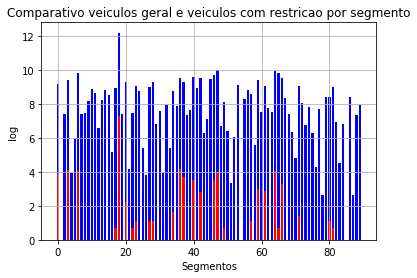

In [200]:
#Ajusta os dados de validacao ao best_clusterer
        
data_validacao_pred = best_clusterer.predict(data_validacao_pca) #predição dos dados alvo nos clusteres treinados
freq_validacao = np.bincount(data_validacao_pred) #distribuição de frequência por clusters dos dados alvo
        
a = best_freq_labels.shape[0] - freq_validacao.shape[0]        #ajusta o tamanho de freq_validacao
freq_validacao = np.append(freq_validacao, np.zeros(a))   #ao tamanho de best_freq_labels

validacao_ratio=np.divide(freq_validacao.astype(float),best_freq_labels)
validacao_score = np.multiply(freq_validacao, validacao_ratio)
perc_max_validacao=100*freq_validacao[np.argmax(freq_validacao)]/np.sum(freq_validacao)

log_best_freq = np.log(best_freq_labels)
log_freq_validacao = np.log(freq_validacao)

x_best_labels =  np.arange(0, (1+best_labels.max()))

plot_thwo_bars_graph(log_best_freq, log_freq_validacao, title = "Comparativo veiculos geral e veiculos com restricao por segmento", y_label = "log", x_label = "Segmentos")

O Segmento 18 é o segmento com maior taxa de veículos com restricao, 0.0076


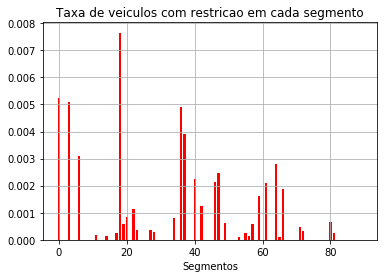

In [264]:
plot_bar_graph(validacao_ratio, x_best_labels, cor='red', x_label = "Segmentos", y_label = "", title = "Taxa de veiculos com restricao em cada segmento")
print "O Segmento {} é o segmento com maior taxa de veículos com restricao, {:.4f}" .format(np.argmax(validacao_ratio), np.max(validacao_ratio))

O Segmento 18 é o segmento com maior score, 11.3441.
Esse seguimento possui 71.75% dos veículos com restricao
O segmento 18 representa 31.33% dos veículos em geral.


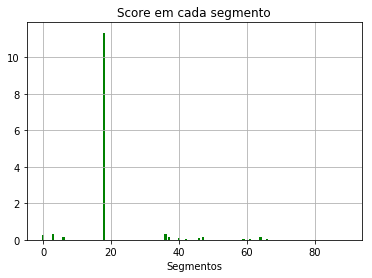

In [265]:
plot_bar_graph(validacao_score, x_best_labels, cor='green', x_label = "Segmentos", y_label = "", title = "Score em cada segmento")
print "O Segmento {} é o segmento com maior score, {:.4f}." .format(np.argmax(validacao_score), np.max(validacao_score))
print "Esse seguimento possui {:.2f}% dos veículos com restricao" .format(perc_max_validacao)
perc_max_labels=100*best_freq_labels[np.argmax(freq_validacao)].astype(float)/np.sum(best_freq_labels)
print "O segmento {} representa {:.2f}% dos veículos em geral." .format(np.argmax(freq_validacao), perc_max_labels)